In [1]:
##Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

## Objectives

1. Top five (5) most sold products?
2. Which category of products generated the most revenue?
3. Top ten(10) cities that recorded the higest revenue.
4. Preferred choice of shipment by customers.
5. Sales trend over the three (3) years
6. Sales performance between 2017 and 2018

In [2]:
sales_data = pd.read_csv('sales_data.csv')

In [3]:
sales_data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
sales_data.shape

(9800, 18)

### Top five(5) most sold products

In [7]:
product_sales = sales_data.groupby('Product Name').sum()['Sales'].reset_index()

In [8]:
top5product= product_sales.sort_values('Sales', ascending =False)

The top 5 products are listed below with Canon imageCLASS 2200 Advanced Copier being sold the most

In [9]:
## top 5 most sold products
top5product.head(5)


,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,21870.576
685,GBC DocuBind TL300 Electric Binding System,19823.479


## What category of product sells the most?

In [10]:
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
sales_category= sales_data.groupby('Category').sum()['Sales'].reset_index()

In [12]:
sales_category.head()

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


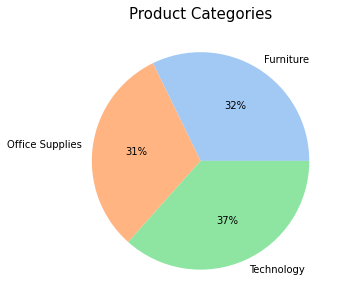

In [13]:
plt.figure(figsize= (5,5))
plt.title('Product Categories', fontsize= 15)
labels = ['Furniture','Office Supplies', 'Technology']
colors = sns.color_palette('pastel')
plt.pie(sales_category.Sales, labels=labels, colors= colors, autopct= '%0.f%%')
plt.show()

37% of the total sales recored were technology products.

## Top performing sub- categorised products

In [14]:
sales_subcategory = sales_data.groupby('Sub-Category').sum()['Sales'].reset_index()
sales_subcategory = sales_subcategory.sort_values('Sales', ascending = False)

In [15]:
x= sales_subcategory['Sub-Category']
y= sales_subcategory['Sales']

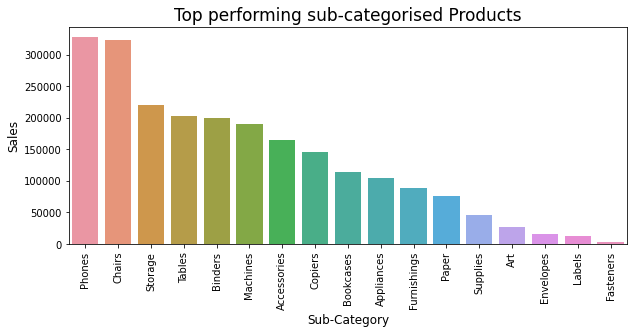

In [16]:
plt.figure(figsize=(10,4))
plt.title('Top performing sub-categorised Products', fontsize = 17)
plt.xticks(rotation= 90)
plt.xlabel('City', fontsize= 12)
plt.ylabel('Sales', fontsize= 12)
sns.barplot(x=x,y=y)
plt.show()

* Phones are the most sold sub categorised product 

### Further analysis on the most sold product (Phones)


In [17]:
## filtering sales data on only phones
phone_sales = sales_data.loc[sales_data['Sub-Category'] == 'Phones']

In [18]:
top10phones= phone_sales.groupby('Product Name').sum()['Sales'].reset_index().head(10)

top10phones.head(100)

,Product Name,Sales
0,ARKON Windshield Dashboard Air Vent Car Mount ...,149.160
1,AT&T 1070 Corded Phone,1070.304
2,AT&T 1080 Corded phone,1945.258
3,AT&T 1080 Phone,1589.084
4,AT&T 17929 Lendline Telephone,1339.104
5,AT&T 841000 Phone,1614.600
6,AT&T CL2909,755.940
7,AT&T CL82213,481.234
8,AT&T CL83451 4-Handset Telephone,1936.306
9,AT&T EL51110 DECT,377.970


In [19]:
top10phones= top10phones.sort_values('Sales', ascending = False)

In [20]:
x=top10phones['Product Name']
y=top10phones['Sales']

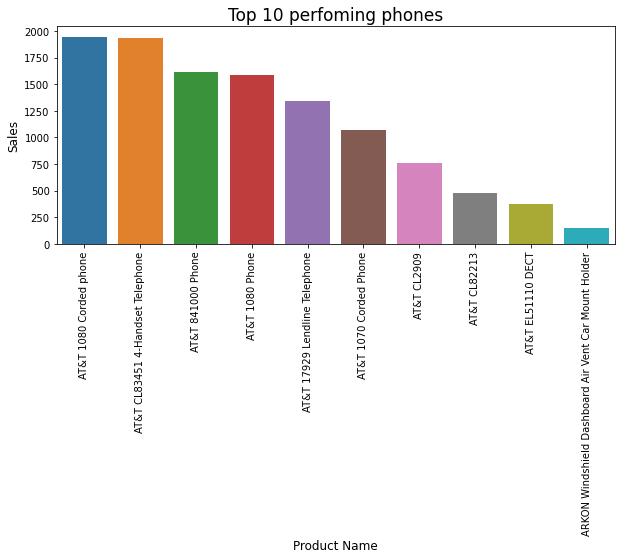

In [21]:
plt.figure(figsize=(10,4))
plt.title('Top 10 perfoming phones', fontsize = 17)
plt.xticks(rotation= 90)
plt.xlabel('Phones', fontsize= 12)
plt.ylabel('Sales', fontsize= 12)
sns.barplot(x=x,y=y)
plt.show()

* AT&T 1080 Corded phone generated the highest revenue

## Top five (10) performing cities in terms of sales.

In [22]:
city_sales =sales_data.groupby('City').sum()['Sales'].reset_index()

In [23]:
top10city= city_sales.sort_values('Sales', ascending = False).head(10)

* The top ten (10) performing cities are listed above with New York City topping in terms of sales

In [24]:
## comparing the top ten cities in terms of sales

top10city.head(10)

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


In [25]:
x= top10city['City']
y= top10city['Sales']

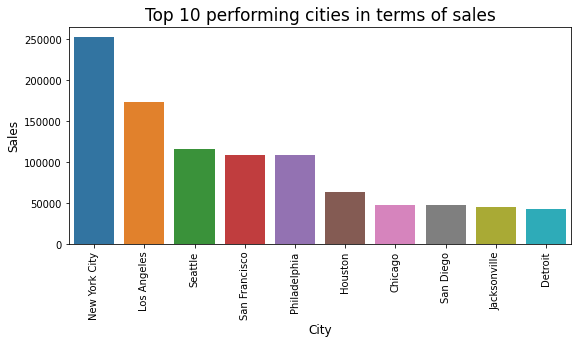

In [26]:
plt.figure(figsize=(9,4))
plt.title('Top 10 performing cities in terms of sales', fontsize = 17)
plt.xticks(rotation= 90)
plt.xlabel('City', fontsize= 12)
plt.ylabel('Sales', fontsize= 12)
sns.barplot(x=x,y=y)
plt.show()

## Preferred mode of shipment

In [27]:
preferred_ship =sales_data.groupby('Ship Mode').count()['Order ID'].reset_index()

preferred_ship.head()

,Ship Mode,Order ID
0,First Class,1501
1,Same Day,538
2,Second Class,1902
3,Standard Class,5859


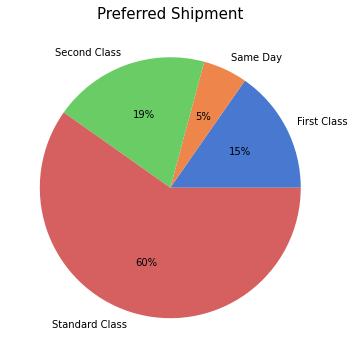

In [28]:
plt.figure(figsize= (6,6))
plt.title('Preferred Shipment', fontsize= 15)
labels = ['First Class','Same Day', 'Second Class','Standard Class']
colors = sns.color_palette('muted')
plt.pie(preferred_ship['Order ID'], labels=labels, colors= colors, autopct= '%0.f%%')
plt.show()

* Clearly, the preferred mode of shipment for most customers is 'Standard Class'

* Only a 5% of customers would opt for the 'Same Day' shipment mode probably because of the extra cost involved.
* Most customers don't want to incurr extra cost for shipping their products.

## Sales trend over the three (3) years


In [29]:
## created a new column as Order Month (m/Y)
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format = '%d/%m/%Y')
sales_data['Order Month'] = sales_data['Order Date'].dt.to_period('M')
sales_data = sales_data.sort_values('Order Month', ascending = True)

In [30]:
## furniture supplies data

furniture_sales = sales_data.loc[sales_data['Category'] == 'Furniture',['Order Month','Sales']].reset_index(drop= True)
furniture_sales = furniture_sales.groupby('Order Month').sum().reset_index()
furniture_sales['Order Month'] = furniture_sales['Order Month'].dt.strftime('%m-%Y')
furniture_sales.head()

,Order Month,Sales
0,01-2015,6217.277
1,02-2015,1839.658
2,03-2015,14243.368
3,04-2015,7944.837
4,05-2015,6912.787


In [31]:
## office supplies data
officesupplies_sales = sales_data.loc[sales_data['Category'] == 'Office Supplies',['Order Month','Sales']].reset_index(drop= True)
officesupplies_sales = officesupplies_sales.groupby('Order Month').sum().reset_index()
officesupplies_sales['Order Month'] = officesupplies_sales['Order Month'].dt.strftime('%m-%Y')
officesupplies_sales.head(5)

,Order Month,Sales
0,01-2015,4845.140
1,02-2015,1071.724
2,03-2015,8602.455
3,04-2015,10988.874
4,05-2015,7131.640


In [32]:
## technology data
technology_sales = sales_data.loc[sales_data['Category'] == 'Technology',['Order Month','Sales']].reset_index(drop= True)
technology_sales = technology_sales.groupby('Order Month').sum().reset_index()
technology_sales['Order Month'] = technology_sales['Order Month'].dt.strftime('%m-%Y')

technology_sales.head(5)

,Order Month,Sales
0,01-2015,3143.290
1,02-2015,1608.510
2,03-2015,32359.974
3,04-2015,8973.144
4,05-2015,9599.876


In [33]:
a = furniture_sales['Order Month']
b = furniture_sales['Sales']

c = officesupplies_sales['Order Month']
d = officesupplies_sales['Sales']

e = technology_sales['Order Month']
f = technology_sales['Sales']

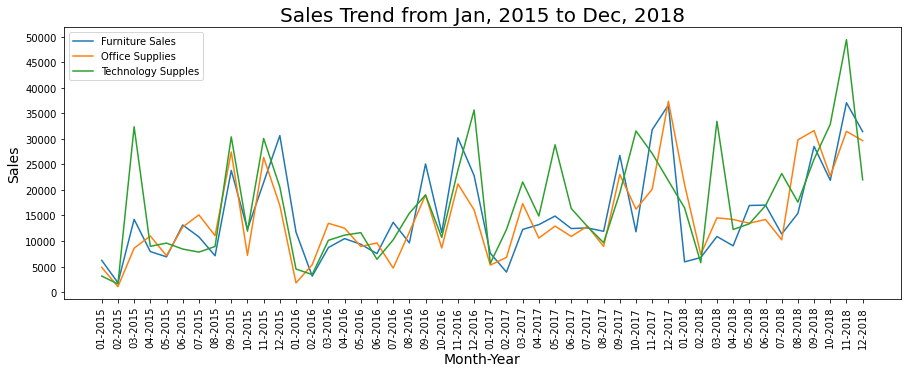

In [34]:
plt.figure(figsize=(15,5))
plt.plot(a,b, label = 'Furniture Sales')
plt.plot(c,d, label = 'Office Supplies')
plt.plot(e,f, label = 'Technology Supples' )
plt.title('Sales Trend from Jan, 2015 to Dec, 2018', fontsize = 20)
plt.xlabel('Month-Year', fontsize = 14)
plt.ylabel('Sales', fontsize = 14)
plt.legend()
plt.xticks(rotation =90)
plt.yticks(np.arange(0,55000,5000))

plt.show()

In [35]:
sales_data['Order Year'] = sales_data['Order Date'].dt.to_period('Y')
sales_data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Month,Order Year
6333,6334,CA-2015-167927,2015-01-20,26/01/2015,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,Michigan,48185.0,Central,OFF-BI-10004364,Office Supplies,Binders,Storex Dura Pro Binders,29.70,2015-01,2015
7474,7475,CA-2015-167199,2015-01-06,10/01/2015,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.82,2015-01,2015


## Sales performance between  2017 and 2018


In [36]:
## filtering data for 2017 and 2018
sales2017 = sales_data.loc[sales_data['Order Year'] == '2017',['Category','Sales']].reset_index(drop =True)
sales2017 = sales2017.groupby('Category').sum().reset_index()
sales2017.columns = sales2017.columns.str.replace('Sales','2017 Sales')

sales2018 = sales_data.loc[sales_data['Order Year'] == '2018',['Category','Sales']].reset_index()
sales2018 = sales2018.groupby('Category').sum().reset_index()
sales2018.columns = sales2018.columns.str.replace('Sales','2018 Sales')

sales2017_2018 =sales2017.join(sales2018['2018 Sales'])
sales2017_2018.head()

,Category,2017 Sales,2018 Sales
0,Furniture,195813.040,212313.7872
1,Office Supplies,182417.566,240367.5410
2,Technology,221961.944,269370.6910


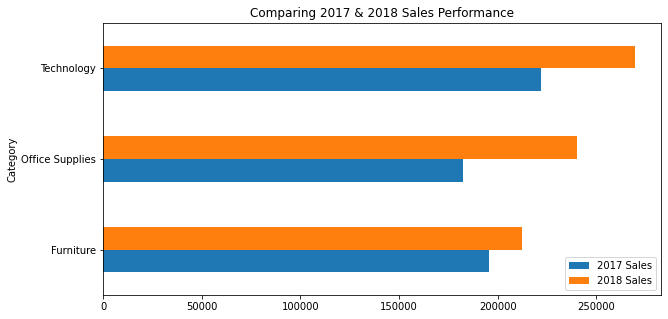

In [37]:
title = 'Comparing 2017 & 2018 Sales Performance'
sales2017_2018[['Category', '2017 Sales', '2018 Sales']].plot(x='Category', kind ='barh', figsize=(10,5), title=title)

plt.show()

* The company performed better in terms of sales in 2018 than in 2017